In [2]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os
import flopy as fp
import pyemu
import pandas as pd

sys.path.append("../../../")
#my modules
import ArchPy

In [158]:
T1 = ArchPy.inputs.import_project("P1", "./ArchPy_workspace")

### IMPORTING PROJECT P1 IN ./ArchPy_workspace DIRECTORY ### 

Surface_1_dic_surf_mean.npy
Unit A: Surface added for interpolation
Facies basement added to unit A ✅
Unit B: Surface added for interpolation
Facies Sand added to unit B ✅
Facies Gravel added to unit B ✅
Facies GM added to unit B ✅
Facies SM added to unit B ✅
Unit C: Surface added for interpolation
Facies Clay added to unit C ✅
Facies Silt added to unit C ✅
The SubPile object is not an Arch_table object
Unit D: Surface added for interpolation
Facies Sand added to unit D ✅
Facies SM added to unit D ✅
Unit D1: Surface added for interpolation
Facies Sand added to unit D1 ✅
Unit D2: Surface added for interpolation
Facies SM added to unit D2 ✅
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅
Stratigraphic unit D2 added ✅
Stratigraphic unit D1 added ✅
Pile sets as Pile master
Property K added
## Adding Grid ##
## Grid added and is now simulation grid ##


 ##LOADI

In [3]:
folder_results = "results/IES_20_iterations_allSurfs_khomo/"

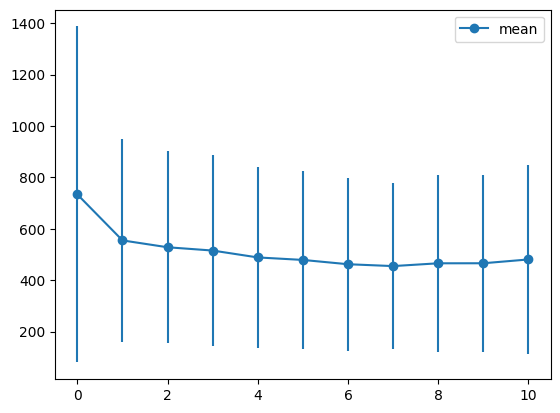

In [21]:
#phi actual
df_phi = pd.read_csv(folder_results + "test.phi.actual.csv")
df_phi.plot(y="mean", yerr="standard_deviation", marker="o")

idx_min = df_phi["mean"].idxmin()

In [56]:
df_initial = pd.read_csv(folder_results + "ensemble_start.csv").iloc[:, 2:]

In [ ]:
d = {}
for i in range(-10, 0, 1):
    d[df_initial.columns[i]] = param_name.values[10+i]
df_initial = df_initial.rename(columns=d)

In [59]:
df_min = pd.read_csv(folder_results + f"test.{idx_min}.par.csv").iloc[:, 1:]

C:\Users\emmal\AppData\Local\Temp\ipykernel_20128\4288808566.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [60]:
pst = pyemu.Pst(folder_results+"test.pst")

In [61]:
pst.parameter_data.pargp.unique()

array(['mean_c', 'k_layers', 'mean_d1', 'mean_b', 'mean_a'], dtype=object)

In [62]:
param_name = pst.parameter_data.parnme.loc[pst.parameter_data.pargp=="k_layers"]

In [92]:
param_name.values

array(['k_d2', 'k_d1', 'k_c', 'k_b', 'k_a', 'k33_d2', 'k33_d1', 'k33_c',
       'k33_b', 'k33_a'], dtype=object)

In [141]:
n_members = df_initial.shape[0]
n_members

150

In [145]:
nrow = 70
ncol = 140

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

## K

Text(0.5, 0, 'log10(k_layers) [m/s]')

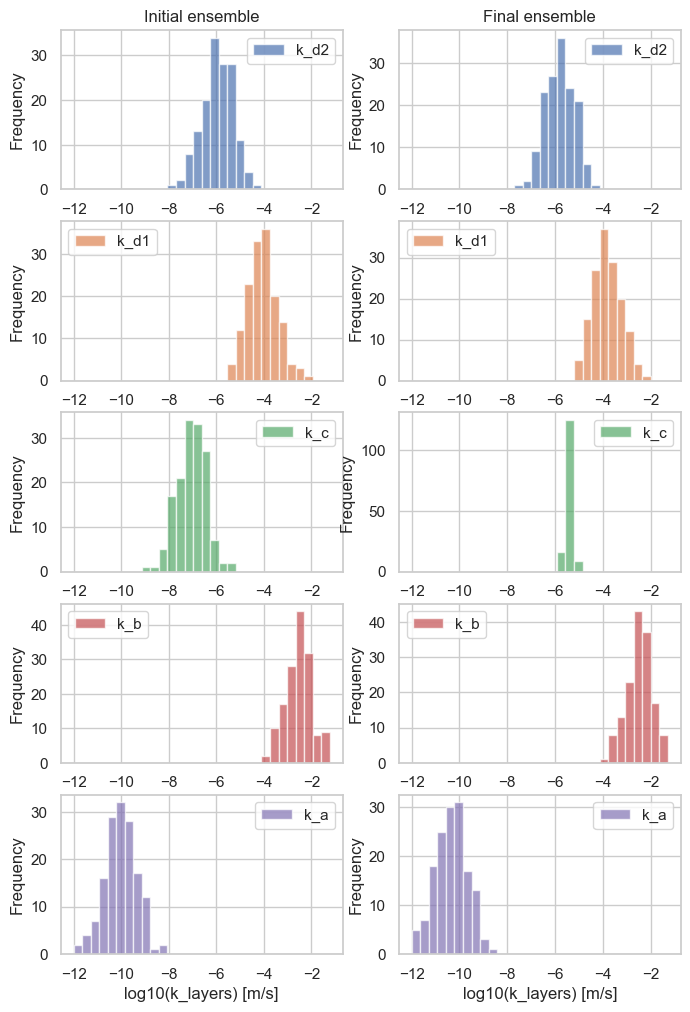

In [133]:
fig, ax = plt.subplots(5, 2, figsize=(8, 12))

np.log10(df_min[param_name[:5]]).plot(kind="hist", subplots=True, ax=ax[:, 1], alpha=.7, bins=30)
np.log10(df_initial[param_name[:5]]).plot(kind="hist", subplots=True, ax=ax[:, 0], alpha=.7, bins=30)

ax[0, 0].set_title("Initial ensemble")
ax[0, 1].set_title("Final ensemble")

ax[-1, 0].set_xlabel("log10(k_layers) [m/s]")
ax[-1, 1].set_xlabel("log10(k_layers) [m/s]")

Text(0.5, 0, 'anisotropic factor')

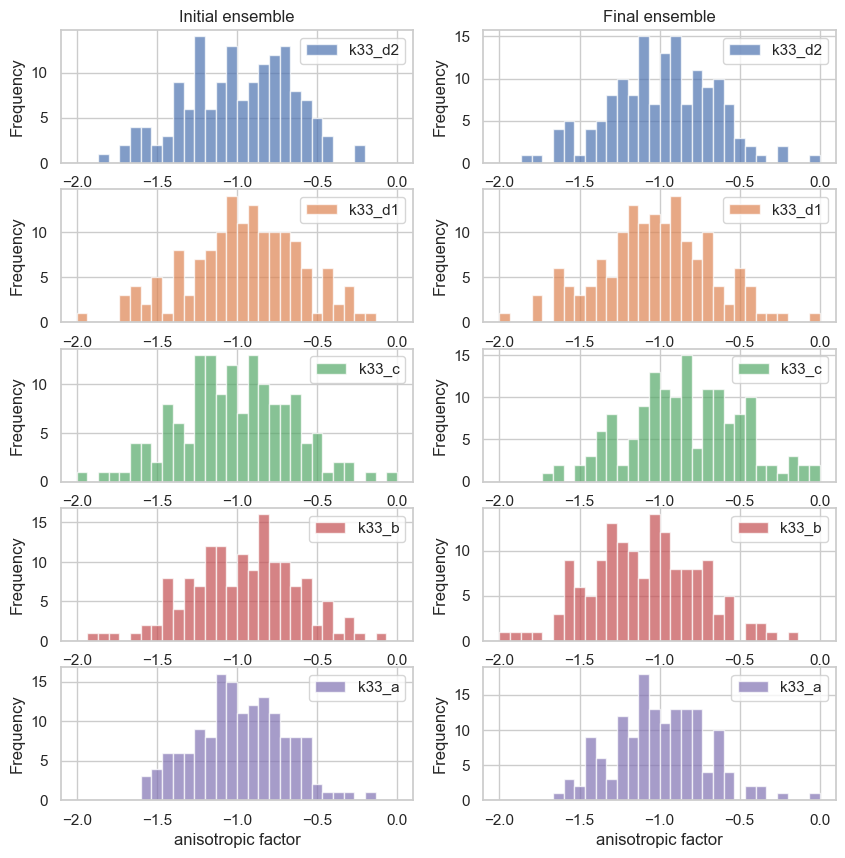

In [135]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))
np.log10(df_min[param_name[5:]]).plot(kind="hist", subplots=True, ax=ax[:, 1], alpha=.7, bins=30)
np.log10(df_initial[param_name[5:]]).plot(kind="hist", subplots=True, ax=ax[:, 0], alpha=.7, bins=30)

ax[0, 0].set_title("Initial ensemble")
ax[0, 1].set_title("Final ensemble")

ax[-1, 0].set_xlabel("anisotropic factor")
ax[-1, 1].set_xlabel("anisotropic factor")

## Surfaces

In [188]:
reference = np.flipud(T1.get_surfaces_unit(T1.get_unit("C"))[0])

In [189]:
mean_Surf = np.loadtxt(folder_results + "mean_C.txt")

In [190]:
param_name = pst.parameter_data.parnme.loc[pst.parameter_data.pargp=="mean_c"]

In [191]:
all_reals_B_min = mean_Surf * df_min[param_name].values.reshape(n_members, nrow, ncol).astype(float)
all_reals_B_initial = mean_Surf * df_initial[param_name].values.reshape(n_members, nrow, ncol).astype(float)

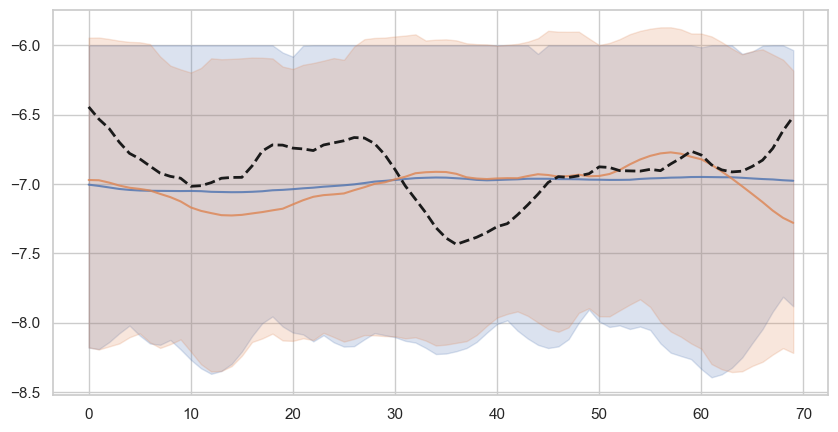

In [201]:
icol = 25
plt.figure(figsize=(10, 5))
plt.plot(all_reals_B_initial[:, :, icol].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(nrow), all_reals_B_initial[:, :, icol].min(axis=0), all_reals_B_initial[:, :, icol].max(axis=0), color="C0", alpha=0.2)
plt.plot(all_reals_B_min[:, :, icol].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(nrow), all_reals_B_min[:, :, icol].min(axis=0), all_reals_B_min[:, :, icol].max(axis=0), color="C1", alpha=0.2)
plt.plot(reference[:, icol], "k--", lw=2)

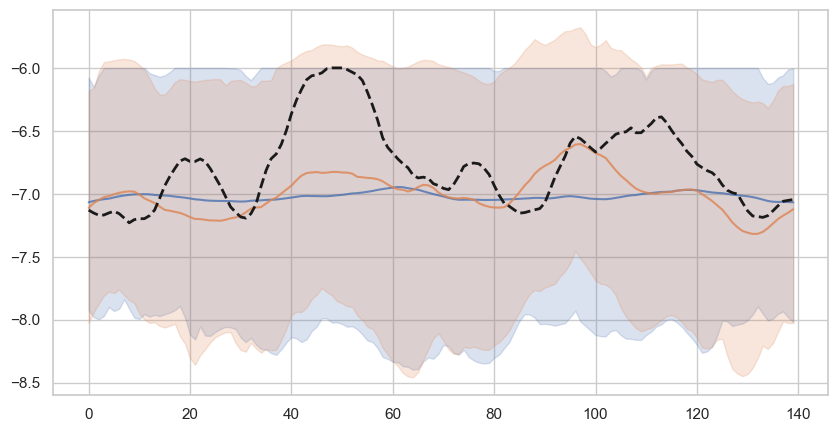

In [200]:
irow = 16
plt.figure(figsize=(10, 5))
plt.plot(all_reals_B_initial[:, irow, :].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(ncol), all_reals_B_initial[:, irow, :].min(axis=0), all_reals_B_initial[:, irow, :].max(axis=0), color="C0", alpha=0.2)
plt.plot(all_reals_B_min[:, irow, :].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(ncol), all_reals_B_min[:, irow, :].min(axis=0), all_reals_B_min[:, irow, :].max(axis=0), color="C1", alpha=0.2)
plt.plot(reference[irow, :], "k--", lw=2)

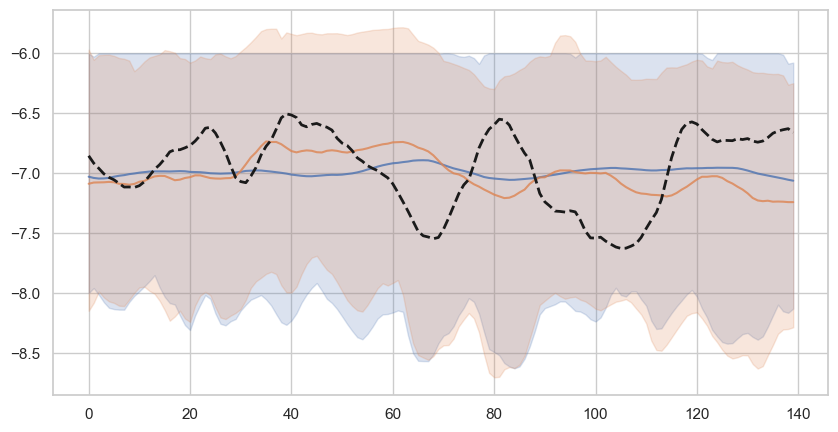

In [202]:
irow = 26
plt.figure(figsize=(10, 5))
plt.plot(all_reals_B_initial[:, irow, :].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(ncol), all_reals_B_initial[:, irow, :].min(axis=0), all_reals_B_initial[:, irow, :].max(axis=0), color="C0", alpha=0.2)
plt.plot(all_reals_B_min[:, irow, :].mean(axis=0), alpha=0.8)
plt.fill_between(np.arange(ncol), all_reals_B_min[:, irow, :].min(axis=0), all_reals_B_min[:, irow, :].max(axis=0), color="C1", alpha=0.2)
plt.plot(reference[irow, :], "k--", lw=2)

(0.0, 1.0)

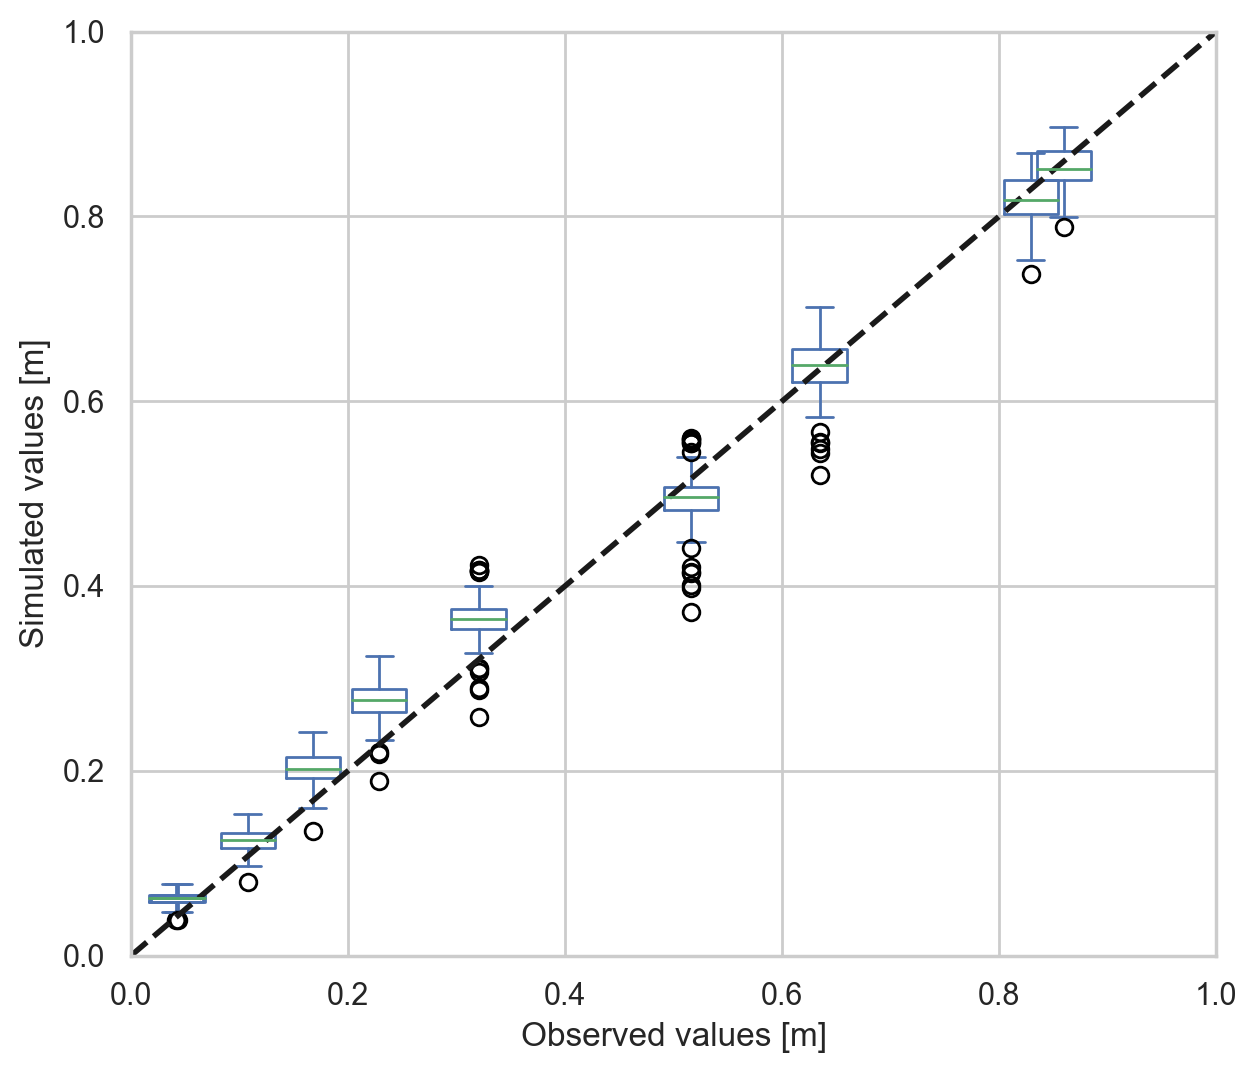

In [277]:
fig = plt.figure(figsize=(7, 6), dpi=200)
ax = plt.gca()
pd.read_csv(folder_results + f"test.{idx_min}.obs.csv").iloc[:, 1:].plot(kind="box", ax=ax, positions=pst.observation_data.obsval.values, widths=0.05, xlabel=None)
# plt.plot(range(1, 11), pst.observation_data.obsval.values, marker="*", linestyle="none", c="r")

# set x ticks as y numbers
ax.set_xticks(ax.get_yticks())
ax.set_xticklabels(ax.get_yticklabels())

# plot y=x line
plt.plot((0, 1), (0, 1), "k--", lw=2)

ax.set_xlabel("Observed values [m]")
ax.set_ylabel("Simulated values [m]")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# ax.axis("equal")

In [294]:
i_iter, ireal = np.where(df_phi.iloc[:,6:] == df_phi["min"].min())
i_iter = i_iter[0]
ireal = ireal[0]

Text(0.001, 0.95, 'RMSE best realization: 0.019 m')

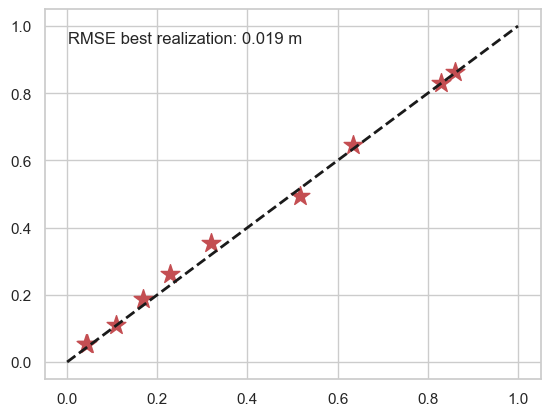

In [309]:
best_obs_reals = pd.read_csv(folder_results + f"test.{i_iter}.obs.csv").loc[ireal].values
plt.scatter(pst.observation_data.obsval.values, best_obs_reals[1:], marker="*", s=200, c="r", label="Best realization")
plt.plot((0, 1), (0, 1), "k--", lw=2)

# compute rmse
rmse = np.sqrt(np.mean((pst.observation_data.obsval.values - best_obs_reals[1:])**2))
plt.text(0.001, 0.95, f"RMSE best realization: {rmse:.3f} m")

In [326]:
np.mean(np.sqrt(np.mean((pst.observation_data.obsval.values - pd.read_csv(folder_results + f"test.{idx_min}.obs.csv").iloc[:, 1:].values)**2, axis=1)))

0.03216864075063589